<a href="https://colab.research.google.com/github/PuChan-HCI/myweb/blob/main/MediaSystem/ImageProcessing05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning JPEG

## JPEG with Python

In [1]:
import urllib.request
url = 'https://raw.githubusercontent.com/PuChan-HCI/myweb/main/MediaSystem/Einstein.jpg'
file_name = 'Einstein.jpg'
urllib.request.urlretrieve(url, file_name)

('Einstein.jpg', <http.client.HTTPMessage at 0x7b815eb08df0>)

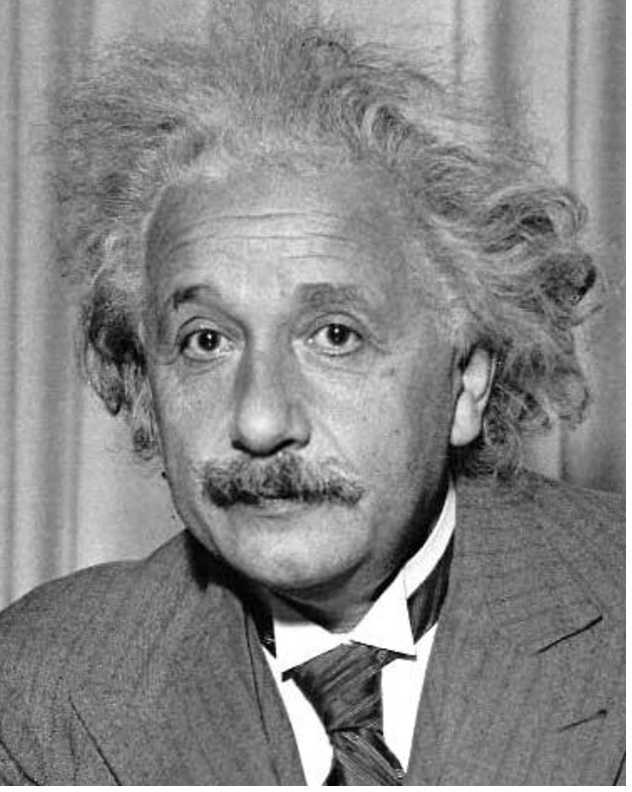

In [2]:
from numpy.lib.nanfunctions import nanpercentile
"""
Simulation of basic JPEG compression (DCT + quant)zation IDCT,
"""
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Q_Matrix = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                     [12, 12, 14, 19, 26, 58, 60, 55],
                     [14, 13, 16, 24, 40, 57, 69, 56],
                     [14, 17, 22, 29, 51, 87, 80, 62],
                     [18, 22, 37, 56, 68, 109, 103, 77],
                     [24, 35, 55, 64, 81, 104, 113, 92],
                     [49, 64, 78, 87, 103, 121, 120, 101],
                     [72, 92, 95, 98, 112, 100, 103, 99]])

def JPEG_DCT(img):

  img = cv2.imread(img,0)                         # Read as 1 ch grayscale image
  height, width = img.shape[:2]                   # Image size

  # Set size to a multiply of 8
  if (width % 8) != 0:
    filler = img[:,width-1:]
    for i in range(8 - (width % 8)):
      img = np.append(img, filler, 1)

  if (height % 8) != 0:
    filler = img[height-1:,:]
    for i in range(8 - (height % 8)):
      img = np.append(img, filler, 0)

  # The final image size
  height, width = img.shape[:2]

  # Array as storage for DCT + quant.result
  img2 = np.empty(shape=(height, width))

  # Forward
  for startY in range(0, height, 8):
    for startX in range(0, width, 8):
      block = img[startY:startY+8, startX:startX+8]

      # Apply DCT for a block
      blockf = np.float32(block)                # float conversion
      dst = cv2.dct(blockf)                     # dct

      if (startY==0 and startX==0):
        dctval=dst

      # quantization of the DCT coefficients
      blockq = np.around(np.divide(dst, Q_Matrix))
      blockq = np.multiply(blockq, Q_Matrix)

      # store the result
      for y in range(8):
        for x in range(8):
          img2[startY+y, startX+x] = blockq[y, x]

    block1 = img[0:8, 0:8]
    block1 = img2[0:8, 0:8]

  # Inverse
  for startY in range(0, height, 8):
    for startX in range(0, width, 8):
      block = img2[startY:startY+8, startX:startX+8]
      blockf = np.float32(block)     # float conversion
      dst = cv2.idct(blockf)         # inverse dct
      np.place(dst, dst>255.0, 255.0)     # saturation
      np.place(dst, dst<0.0, 0.0)         # grounding
      block = np.uint8(np.around(dst))

      # store the results
      for y in range(8):
        for x in range(8):
          img[startY+y, startX+x] = block[y, x]
  block1 = img[0:8, 0:8]
  cv2_imshow(img)

if __name__ == '__main__':
  # Read an image
  JPEG_DCT(file_name)




## Set the Q-value in JPEG

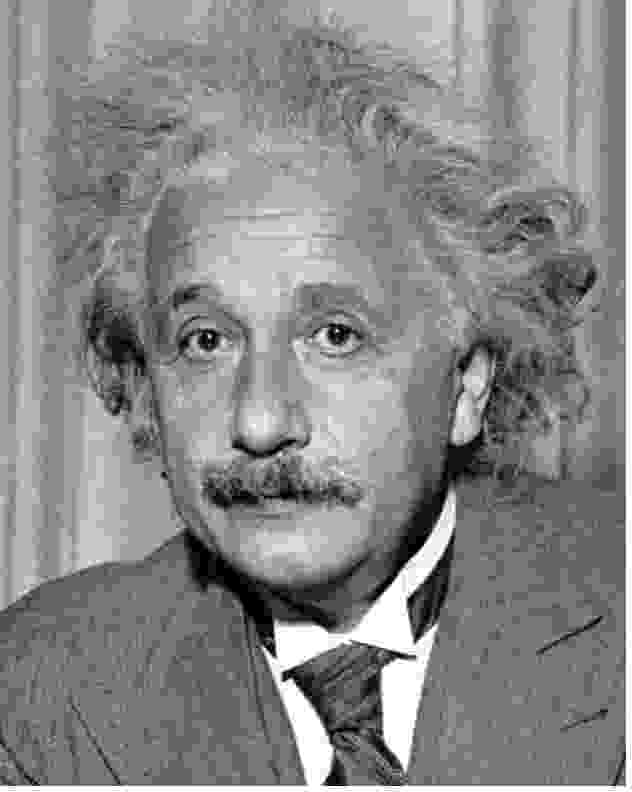

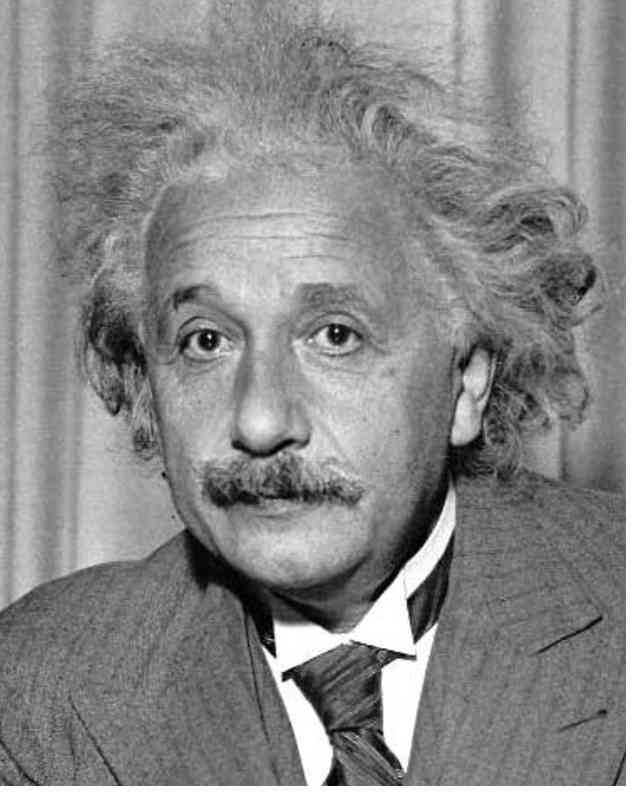

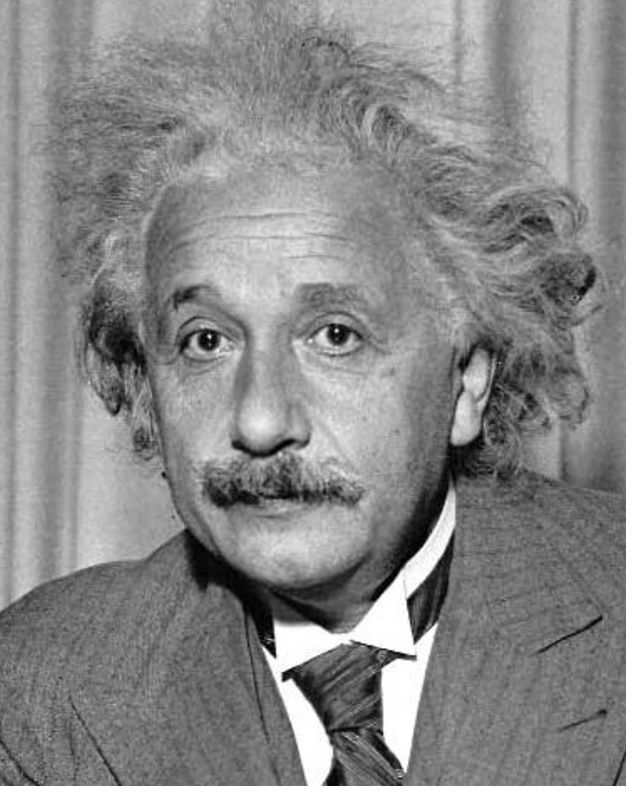

In [3]:
from numpy.lib.nanfunctions import nanpercentile
"""
Simulation of basic JPEG compression (DCT + quant)zation IDCT,
"""
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



def GetQmatrix(quality):

  # Q50 (quality at 50)
  Q_Matrix = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                     [12, 12, 14, 19, 26, 58, 60, 55],
                     [14, 13, 16, 24, 40, 57, 69, 56],
                     [14, 17, 22, 29, 51, 87, 80, 62],
                     [18, 22, 37, 56, 68, 109, 103, 77],
                     [24, 35, 55, 64, 81, 104, 113, 92],
                     [49, 64, 78, 87, 103, 121, 120, 101],
                     [72, 92, 95, 98, 112, 100, 103, 99]])

  # Create a new Q_Matrix based on the quality
  if(quality <= 0):
    quality = 1
  if(quality > 100):
    quality = 100
  if(quality < 50):
    qualityScale = 5000 / quality
  else:
    qualityScale = 200 - quality * 2

  Q_Matrix_New = np.array(np.floor((Q_Matrix * qualityScale + 50) / 100))
  Q_Matrix_New[Q_Matrix_New == 0] = 1
  Q_Matrix_New[Q_Matrix_New > 255] = 255
  Q_Matrix_New = Q_Matrix_New.reshape([8, 8]).astype(int)

  return Q_Matrix_New

def JPEG_DCT(img, quality):

  img = cv2.imread(img,0)                         # Read as 1 ch grayscale image
  height, width = img.shape[:2]                   # Image size

  # Set size to a multiply of 8
  if (width % 8) != 0:
    filler = img[:,width-1:]
    for i in range(8 - (width % 8)):
      img = np.append(img, filler, 1)

  if (height % 8) != 0:
    filler = img[height-1:,:]
    for i in range(8 - (height % 8)):
      img = np.append(img, filler, 0)

  # The final image size
  height, width = img.shape[:2]

  # Array as storage for DCT + quant.result
  img2 = np.empty(shape=(height, width))

  # Get the quantization matrix
  Q_Matrix_New = GetQmatrix(quality)

  # Forward
  for startY in range(0, height, 8):
    for startX in range(0, width, 8):
      block = img[startY:startY+8, startX:startX+8]

      # Apply DCT for a block
      blockf = np.float32(block)                # float conversion
      dst = cv2.dct(blockf)                     # dct

      if (startY==0 and startX==0):
        dctval=dst

      # quantization of the DCT coefficients
      blockq = np.around(np.divide(dst, Q_Matrix_New))
      blockq = np.multiply(blockq, Q_Matrix_New)

      # store the result
      for y in range(8):
        for x in range(8):
          img2[startY+y, startX+x] = blockq[y, x]

    block1 = img[0:8, 0:8]
    block1 = img2[0:8, 0:8]

  # Inverse
  for startY in range(0, height, 8):
    for startX in range(0, width, 8):
      block = img2[startY:startY+8, startX:startX+8]
      blockf = np.float32(block)     # float conversion
      dst = cv2.idct(blockf)         # inverse dct
      np.place(dst, dst>255.0, 255.0)     # saturation
      np.place(dst, dst<0.0, 0.0)         # grounding
      block = np.uint8(np.around(dst))

      # store the results
      for y in range(8):
        for x in range(8):
          img[startY+y, startX+x] = block[y, x]
  block1 = img[0:8, 0:8]
  cv2_imshow(img)

if __name__ == '__main__':
  # Read an image
  JPEG_DCT(file_name,5)
  JPEG_DCT(file_name,30)
  JPEG_DCT(file_name,80)
